In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from selenium import webdriver
import main
import seaborn as sns
import chromedriver_autoinstaller
from datetime import datetime
from PIL import Image
import urllib

In [17]:
chromedriver_autoinstaller.install()
import warnings
warnings.filterwarnings('ignore')

## Pull Data

In [18]:
if __name__ == "__main__":
    driver = webdriver.Chrome()
    
# whoscored match centre url of the required match (Example: Barcelona vs Sevilla)
url = "https://www.whoscored.com/Matches/1640737/Live/England-Premier-League-2022-2023-Fulham-Chelsea"
match_data = main.getMatchData(driver, url, close_window=True)

# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]
score = matches_df['score'][matchId]
score = ' ' + score.replace(':', '-') + ' '

home_name = home_data['name']
away_name = away_data['name']
date = match_data['startDate'].split('T')[0]
date_ = datetime.strptime(date, '%Y-%m-%d').date()
date_str = date_.strftime('%d/%m/%Y')

Region: England, League: Premier League, Season: 2022/2023, Match Id: 1640737


## Colours 

In [19]:
home_color = '#9C9C9C'
away_color = '#2D5DE7'

In [20]:
events_df["passRecipient"] = events_df['playerName'].shift(-1)
events_df['teamRecipient'] = events_df['teamId'].shift(-1)
column_to_move = events_df.pop("passRecipient")
events_df.insert(26, "passRecipient", column_to_move)
column_to_move = events_df.pop("teamRecipient")
events_df.insert(27, "teamRecipient", column_to_move)

In [21]:
homeid = home_data['teamId']
awayid = away_data['teamId']

In [22]:
events_df['type'].unique()

array(['Start', 'Pass', 'BlockedPass', 'KeeperPickup', 'BallTouch',
       'Dispossessed', 'Tackle', 'BallRecovery', 'Challenge', 'TakeOn',
       'SavedShot', 'Save', 'Clearance', 'Foul', 'Interception',
       'CornerAwarded', 'MissedShots', 'Card', 'OffsideGiven',
       'OffsidePass', 'OffsideProvoked', 'Aerial', 'Error', 'ShotOnPost',
       'Goal', 'ShieldBallOpp', 'End', 'SubstitutionOff',
       'SubstitutionOn', 'FormationChange', 'Claim', 'Smother',
       'FormationSet'], dtype=object)

In [23]:
df_team = events_df[events_df['teamId'] == homeid]

defensive_actions = df_team[(df_team['type'].isin(['Tackle', 'Interception', 'BlockedPass', 'Foul'])) 
                            ].reset_index(drop=True)

# Exclude Aerials won in Opp 1/3
# defensive_actions = defensive_actions[~((defensive_actions['type'] == 'Aerial') 
#                                         & (defensive_actions['x'] > 66.66))]
defensive_actions

,id,eventId,minute,second,teamId,h_a,x,y,expandedMinute,period,...,penaltyShootoutSaved,penaltyShootoutSavedGK,penaltyShootoutConcededGK,throwIn,subOn,subOff,defensiveThird,midThird,finalThird,pos
0,2.496789e+09,7,0,8.0,170,h,77.8,87.0,0,FirstHalf,...,False,False,False,False,False,False,False,False,False,False
1,2.496789e+09,14,1,16.0,170,h,66.3,82.9,1,FirstHalf,...,False,False,False,False,False,False,False,False,False,False
2,2.496789e+09,19,1,58.0,170,h,30.3,42.0,1,FirstHalf,...,False,False,False,False,False,False,False,False,False,False
3,2.496790e+09,33,3,46.0,170,h,38.7,11.5,3,FirstHalf,...,False,False,False,False,False,False,False,False,False,False
4,2.496790e+09,36,3,55.0,170,h,66.9,18.5,3,FirstHalf,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2.496811e+09,804,90,5.0,170,h,69.0,86.5,93,SecondHalf,...,False,False,False,False,False,False,False,False,False,False
58,2.496811e+09,815,91,1.0,170,h,65.8,24.8,94,SecondHalf,...,False,False,False,False,False,False,False,False,False,False
59,2.496811e+09,825,91,54.0,170,h,23.7,73.6,94,SecondHalf,...,False,False,False,False,False,False,False,False,False,False
60,2.496811e+09,861,95,43.0,170,h,39.6,29.0,98,SecondHalf,...,False,False,False,False,False,False,False,False,False,False


In [24]:
tackles = defensive_actions[(defensive_actions['type'] == 'Tackle')].reset_index(drop=True)
tackles_list = tackles.groupby(['playerName'])[['type']].count().reset_index().sort_values(by='type', ascending=False)[:3].reset_index(drop=True)
tackles_list

interceptions = defensive_actions[(defensive_actions['type'] == 'Interception')].reset_index(drop=True)
interceptions_list = interceptions.groupby(['playerName'])[['type']].count().reset_index().sort_values(by='type', ascending=False)[:3].reset_index(drop=True)
interceptions_list

bp = defensive_actions[(defensive_actions['type'] == 'BlockedPass')].reset_index(drop=True)
bp_list = bp.groupby(['playerName'])[['type']].count().reset_index().sort_values(by='type', ascending=False)[:3].reset_index(drop=True)
bp_list

fouls = defensive_actions[(defensive_actions['type'] == 'Foul')].reset_index(drop=True)
fouls_list = fouls.groupby(['playerName'])[['type']].count().reset_index().sort_values(by='type', ascending=False)[:3].reset_index(drop=True)
fouls_list

# aerials_won = defensive_actions[(defensive_actions['type'] == 'Aerial') & 
#                             (defensive_actions['outcomeType'] == 'Successful')].reset_index(drop=True)
# aerials_won_list = aerials_won.groupby(['playerName'])[['type']].count().reset_index().sort_values(by='type', ascending=False)[:3].reset_index(drop=True)
# aerials_won_list

,playerName,type
0,Carlos Vinícius,5
1,Kenny Tete,4
2,Andreas Pereira,3


In [25]:
avg_action = defensive_actions['x'].mean()
avg_action = float(avg_action)
pos = avg_action - 1
avg_action_str = str(round(avg_action, 2))
pos

48.88548387096774

## Away Team 

In [26]:
df_team2 = events_df[events_df['teamId'] == awayid]


defensive_actions2 = df_team2[(df_team2['type'].isin(['Tackle', 'Interception', 'BlockedPass', 'Foul']))].reset_index(drop=True)

# defensive_actions2 = defensive_actions2[~((defensive_actions2['type'] == 'Aerial') 
#                                         & (defensive_actions2['x'] > 66.66))]

tackles2 = defensive_actions2[(defensive_actions2['type'] == 'Tackle')].reset_index(drop=True)
tackles_list2 = tackles2.groupby(['playerName'])[['type']].count().reset_index().sort_values(by='type', ascending=False)[:3].reset_index(drop=True)
tackles_list2

interceptions2 = defensive_actions2[(defensive_actions2['type'] == 'Interception')].reset_index(drop=True)
interceptions_list2 = interceptions2.groupby(['playerName'])[['type']].count().reset_index().sort_values(by='type', ascending=False)[:3].reset_index(drop=True)
interceptions_list2

bp2 = defensive_actions2[(defensive_actions2['type'] == 'BlockedPass')].reset_index(drop=True)
bp_list2 = bp2.groupby(['playerName'])[['type']].count().reset_index().sort_values(by='type', ascending=False)[:3].reset_index(drop=True)
bp_list2

fouls2 = defensive_actions2[(defensive_actions2['type'] == 'Foul')].reset_index(drop=True)
fouls_list2 = fouls2.groupby(['playerName'])[['type']].count().reset_index().sort_values(by='type', ascending=False)[:3].reset_index(drop=True)
fouls_list2

# aerials_won2 = defensive_actions2[(defensive_actions2['type'] == 'Aerial') & 
#                             (defensive_actions2['outcomeType'] == 'Successful')].reset_index(drop=True)
# aerials_won_list2 = aerials_won2.groupby(['playerName'])[['type']].count().reset_index().sort_values(by='type', ascending=False)[:3].reset_index(drop=True)
# aerials_won_list2

,playerName,type
0,João Félix,5
1,Lewis Hall,4
2,Kai Havertz,3


In [27]:
avg_action2 = defensive_actions2['x'].mean()
avg_action2 = float(avg_action2)
pos2 = avg_action2 - 1
avg_action_str2 = str(round(avg_action2, 2))
pos2

42.14794520547946

## Ball Wins 

In [28]:
df_team = events_df[events_df['teamId'] == homeid]

ball_win = df_team[(df_team['type'].isin(['Tackle', 'Interception', 'BlockedPass', 'Foul'])) 
                            ].reset_index(drop=True)

# Exclude aerials won in opp 1/3
# ball_win = ball_win[~((ball_win['type'] == 'Aerial') 
#                     & (ball_win['x'] > 66.66))]

# Win the ball back criteria
ball_win = ball_win[ball_win['teamId'] == ball_win['teamRecipient']].reset_index(drop=True)

ball_wins_list = ball_win.groupby(['playerName'])[['type']].count().reset_index().sort_values(by='type', ascending=False)[:3].reset_index(drop=True)
ball_wins_list


df_team2 = events_df[events_df['teamId'] == awayid]

ball_win2 = df_team2[(df_team2['type'].isin(['Tackle', 'Interception', 'BlockedPass', 'Foul'])) 
                            ].reset_index(drop=True)

# Exclude aerials won in opp 1/3
# ball_win2 = ball_win2[~((ball_win2['type'] == 'Aerial') 
#                     & (ball_win2['x'] > 66.66))]

# Win the ball back criteria
ball_win2 = ball_win2[ball_win2['teamId'] == ball_win2['teamRecipient']].reset_index(drop=True)

ball_wins_list2 = ball_win2.groupby(['playerName'])[['type']].count().reset_index().sort_values(by='type', ascending=False)[:3].reset_index(drop=True)
ball_wins_list2

,playerName,type
0,Kalidou Koulibaly,4
1,Lewis Hall,4
2,Kai Havertz,3


## Defensive Zones - HeatMap 

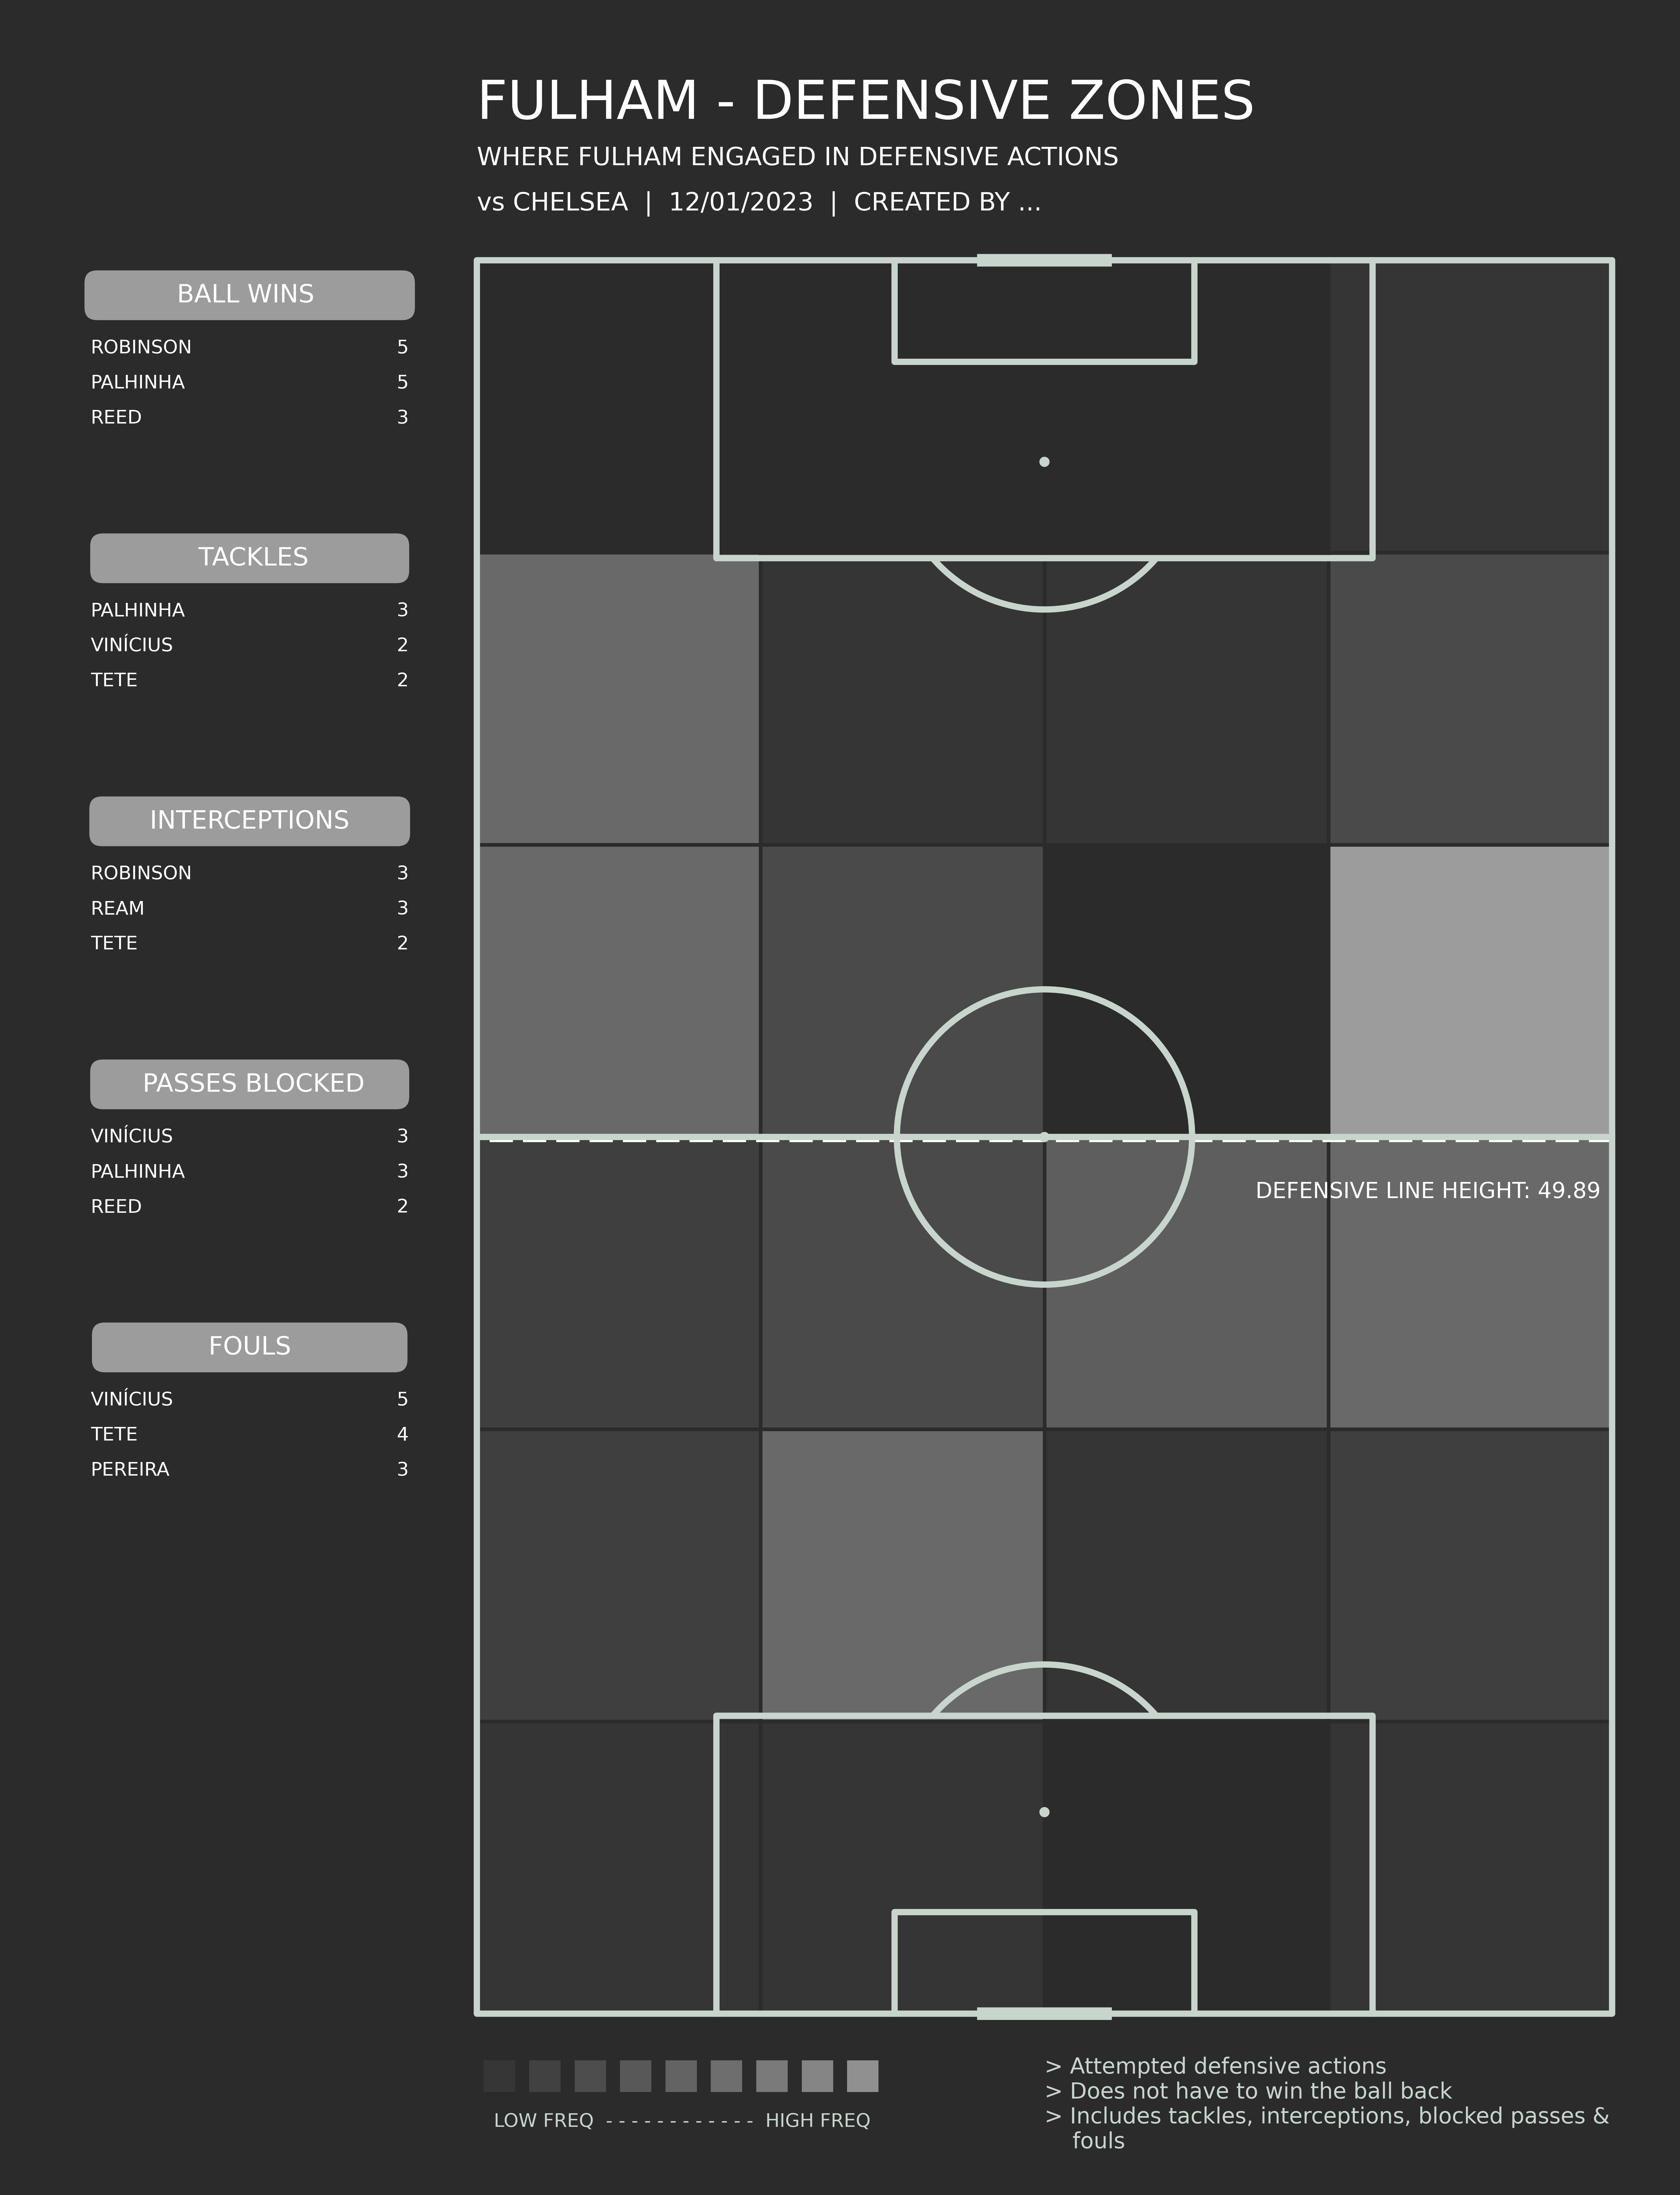

In [29]:
avg_action = defensive_actions['x'].mean()
avg_action = float(avg_action)
pos = avg_action - 1
avg_action_str = str(round(avg_action, 2))


import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
from matplotlib.colors import to_rgba
import matplotlib as mpl
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
import matplotlib.colors
mpl.rcParams['figure.dpi'] = 800


norm=plt.Normalize(-2,2)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#2B2B2B",home_color])


pitch = VerticalPitch(pitch_type='opta', pitch_color='#2B2B2B', line_color='#c7d5cc',pad_top=5, pad_left = 40,
                      line_zorder=2)
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False, 
                      title_space=0, grid_height=0.82, endnote_height=0.05)

fig.set_facecolor("#2B2B2B")

# rectangle1 = plt.Rectangle((0, 0),110,100, color=home_color)
# plt.gca().add_patch(rectangle1, ax=axs['left'])

axs['title'].text(0, 0.55, home_name.upper() + ' - Defensive Zones'.upper(), color='White',
                  va='center', ha='left', fontsize=17, fontname='Sans Serif')
axs['title'].text(0, 0.25, 'Where '.upper() + home_name.upper() + ' engaged in defensive actions'.upper(), color='White',
                  va='center', ha='left', fontsize=8)
axs['title'].text(0, 0.00, 'vs ' + away_name.upper() + '  |  ' + date_str.upper() + '  |  '  + 'CREATED BY ...', color='White',
                  va='center', ha='left', fontsize=8)

bin_statistic = pitch.bin_statistic(defensive_actions.x, defensive_actions.y, statistic='count', bins=(6,4), normalize=True)
pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap=cmap, edgecolor="#2B2B2B")

# pitch.hexbin(defensive_actions.x,defensive_actions.y, ax=axs['pitch'], 
#               cmap=cmap, gridsize=(5, 5))

# labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
#                              ax=axs['pitch'], ha='center', va='center',
#                              str_format='{:.0%}', fontname = 'Sans Serif')

axs['pitch'].annotate(text='          Ball Wins           '.upper(), xytext=(120, 98), xy=(60, 40), ha='center', va='center', color='white',
                     bbox=dict(facecolor=home_color, edgecolor='none', boxstyle='round,pad=.5'),
                     fontname = 'Sans Serif', fontsize=8)

y = 95
i = 0
for p1, cnt in zip(ball_wins_list['playerName'], ball_wins_list['type']):
    p1 = p1.replace('-', ' ')
    p1 = p1.split(' ')
    if len(p1) > 2:
        name = "".join([x[0].upper() for x in p1])
        p1 = name
    elif len(p1) == 1:
        p1 = p1[0]
    else:
        p1 = p1[1]
    axs['pitch'].annotate(text=p1.upper(), 
                          xytext=(134, y - 2*i), xy=(20, 40), ha='left', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6)
    axs['pitch'].annotate(text=cnt, 
                          xytext=(106, y - 2*i), xy=(20, 40), ha='right', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6)
    
    i += 1



axs['pitch'].annotate(text='            Tackles           '.upper(), xytext=(120, 83), xy=(60, 40), ha='center', 
                     va='center', color='white',
                     bbox=dict(facecolor=home_color, edgecolor='none', boxstyle='round,pad=.5'),
                     fontname = 'Sans Serif', fontsize=8)

y = 80
i = 0
for p1, cnt in zip(tackles_list['playerName'], tackles_list['type']):
    p1 = p1.replace('-', ' ')
    p1 = p1.split(' ')
    if len(p1) > 2:
        name = "".join([x[0].upper() for x in p1])
        p1 = name
    elif len(p1) == 1:
        p1 = p1[0]
    else:
        p1 = p1[1]
    axs['pitch'].annotate(text=p1.upper(), 
                          xytext=(134, y - 2*i), xy=(20, 40), ha='left', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6)
    axs['pitch'].annotate(text=cnt, 
                          xytext=(106, y - 2*i), xy=(20, 40), ha='right', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6)
    
    i += 1

axs['pitch'].annotate(text='      Interceptions      '.upper(), xytext=(120, 68), xy=(60, 40), ha='center', va='center', color='white',
                     bbox=dict(facecolor=home_color, edgecolor='none', boxstyle='round,pad=.5'),
                     fontname = 'Sans Serif', fontsize=8)
y = 65
i = 0
for p1, cnt in zip(interceptions_list['playerName'], interceptions_list['type']):
    p1 = p1.replace('-', ' ')
    p1 = p1.split(' ')
    if len(p1) > 2:
        name = "".join([x[0].upper() for x in p1])
        p1 = name
    elif len(p1) == 1:
        p1 = p1[0]
    else:
        p1 = p1[1]
    axs['pitch'].annotate(text=p1.upper(), 
                          xytext=(134, y - 2*i), xy=(20, 40), ha='left', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6)
    axs['pitch'].annotate(text=str(cnt), 
                          xytext=(106, y - 2*i), xy=(20, 40), ha='right', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6)
    
    i += 1

axs['pitch'].annotate(text='     Passes Blocked    '.upper(), xytext=(120, 53), xy=(60, 40), ha='center', va='center', color='white',
                     bbox=dict(facecolor=home_color, edgecolor='none', boxstyle='round,pad=.5'),
                     fontname = 'Sans Serif', fontsize=8)
y = 50
i = 0
for p1, cnt in zip(bp_list['playerName'], bp_list['type']):
    p1 = p1.replace('-', ' ')
    p1 = p1.split(' ')
    if len(p1) > 2:
        name = "".join([x[0].upper() for x in p1])
        p1 = name
    elif len(p1) == 1:
        p1 = p1[0]
    else:
        p1 = p1[1]
    axs['pitch'].annotate(text=p1.upper(), 
                          xytext=(134, y - 2*i), xy=(20, 40), ha='left', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6)
    axs['pitch'].annotate(text=cnt, 
                          xytext=(106, y - 2*i), xy=(20, 40), ha='right', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6)
    
    i += 1

axs['pitch'].annotate(text='             Fouls             '.upper(), xytext=(120, 38), xy=(60, 40), ha='center', va='center', color='white',
                     bbox=dict(facecolor=home_color, edgecolor='none', boxstyle='round,pad=.5'),
                     fontname = 'Sans Serif', fontsize=8)
y = 35
i = 0
for p1, cnt in zip(fouls_list['playerName'], fouls_list['type']):
    p1 = p1.replace('-', ' ')
    p1 = p1.split(' ')
    if len(p1) > 2:
        name = "".join([x[0].upper() for x in p1])
        p1 = name
    elif len(p1) == 1:
        p1 = p1[0]
    else:
        p1 = p1[1]
    axs['pitch'].annotate(text=p1.upper(), 
                          xytext=(134, y - 2*i), xy=(20, 40), ha='left', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6)
    axs['pitch'].annotate(text=cnt, 
                          xytext=(106, y - 2*i), xy=(20, 40), ha='right', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6)
    
    i += 1

# axs['pitch'].annotate(text='       Aerials Won        '.upper(), xytext=(120, 23), xy=(60, 40), ha='center', va='center', color='white',
#                      bbox=dict(facecolor=home_color, edgecolor='none', boxstyle='round,pad=.5'),
#                      fontname = 'Sans Serif', fontsize=8)

# y = 20
# i = 0
# for p1, cnt in zip(aerials_won_list['playerName'], aerials_won_list['type']):
#     p1 = p1.replace('-', ' ')
#     p1 = p1.split(' ')
#     if len(p1) > 2:
#         name = "".join([x[0].upper() for x in p1])
#         p1 = name
#     elif len(p1) == 1:
#         p1 = p1[0]
#     else:
#         p1 = p1[1]
#     axs['pitch'].annotate(text=p1.upper(), 
#                           xytext=(134, y - 2*i), xy=(20, 40), ha='left', va='center', 
#                           color='white', fontname = 'Sans Serif', fontsize = 6)
#     axs['pitch'].annotate(text=cnt, 
#                           xytext=(106, y - 2*i), xy=(20, 40), ha='right', va='center', 
#                           color='white', fontname = 'Sans Serif', fontsize = 6)
    
#     i += 1


avg_action = pitch.lines(avg_action, 0,
                         avg_action, 100, lw=2, color='white',
                         zorder=1, ax=axs['pitch'], linestyle='--')

axs['pitch'].annotate(text='Defensive Line Height: '.upper() + str(avg_action_str), 
                          xytext=(1, pos-2), xy=(20, 40), ha='right', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 7)

axs['endnote'].set_xlim(0, 1)
axs['endnote'].set_ylim(0, 1)

axs['endnote'].text(0.5, 0.6, '> Attempted defensive actions \n> Does not have to win the ball back \n> Includes tackles, interceptions, blocked passes & \n    fouls', color='#c7d5cc',
                    va='center', ha='left', fontsize=7, fontname = 'Sans Serif')
right = 0.04
for i in range(9):
    axs['endnote'].scatter(0.02 + right*i, 0.85, s=100,
                           color=home_color, edgecolors='None',
                           marker='s', alpha=(i/10)+0.1)

    
axs['endnote'].text(0.015, 0.45, 'Low Freq  - - - - - - - - - - - -  High Freq'.upper(), color='#c7d5cc',
                    va='center', ha='left', fontsize=6, fontname = 'Sans Serif') 

fig.savefig('defensiveZones_OneTeam.png', dpi=300)

## Defensive Zones - HeatMap - Two Teams

In [30]:
avg_action = defensive_actions['x'].mean()
avg_action = float(avg_action)
pos = avg_action - 1
avg_action_str = str(round(avg_action, 2))

avg_action2 = defensive_actions2['x'].mean()
avg_action2 = float(avg_action2)
pos2 = avg_action2 - 1
avg_action_str2 = str(round(avg_action2, 2))

FIGWIDTH, FIGHEIGHT = 14, 10
FIGSIZE = (FIGWIDTH, FIGHEIGHT)
FIG_ASPECT = FIGWIDTH / FIGHEIGHT
fig = plt.figure(figsize=FIGSIZE)
# mpl.rcParams['figure.dpi'] = 800

norm=plt.Normalize(-2,2)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#2B2B2B",home_color])
cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#2B2B2B",away_color])



pitch1 = VerticalPitch(pitch_type='opta', pitch_color='#2B2B2B', line_color='#c7d5cc', pad_left = 40,
                       line_zorder=2, pad_bottom=20, pad_right=5,   linewidth=0.6, pitch_length=5, pad_top=30)
pitch2 = VerticalPitch(pitch_type='opta', pitch_color='#2B2B2B', line_color='#c7d5cc', pad_right = 40,
                       line_zorder=2,  pad_bottom=20, pad_left=5,  linewidth=0.6, pitch_length=5, pad_top=30)

fig.set_facecolor("#2B2B2B")

TITLE_HEIGHT = 0.1 # title axes are 10% of the figure height

#  width of pitch axes as percent of the figure width
TOP_WIDTH = 0.48
BOTTOM_WIDTH = 0.25

# calculate the horizontal space between axes (and figure sides) in percent of the figure width
TOP_SPACE = (1 - (TOP_WIDTH * 2)) / 2
BOTTOM_SPACE = (1 - (BOTTOM_WIDTH * 3)) / 2

# calculate the height of the pitch axes in percent of the figure height
height1 = (TOP_WIDTH / pitch1.ax_aspect * FIG_ASPECT)
height2 = (TOP_WIDTH / pitch2.ax_aspect * FIG_ASPECT)


# calculate pitch offsets from center / title locations
vertical_axes_space = (1 - (height1 + TITLE_HEIGHT + TITLE_HEIGHT)) / 5
bottom_offset = ((1 - height2) / 2) - vertical_axes_space
title1_bottom = 1 - vertical_axes_space - TITLE_HEIGHT
title2_bottom = 1 - (vertical_axes_space * 3) - (TITLE_HEIGHT * 2) - height1
top_offset = (1 - title1_bottom - title2_bottom - TITLE_HEIGHT) / 2



# top left
LEFT1 = TOP_SPACE
bottom1 = (1 - height1) / 2 - top_offset
ax1 = fig.add_axes((LEFT1, bottom1, TOP_WIDTH, height1))
pitch1.draw(ax=ax1)

# top right
left2 = (TOP_SPACE ) + (TOP_WIDTH)
bottom2 = (1 - height2) / 2 - top_offset
ax2 = fig.add_axes((left2, bottom2, TOP_WIDTH, height2))
pitch2.draw(ax=ax2)

ax_title2 = fig.add_axes((0, title1_bottom-0.05, 1, TITLE_HEIGHT-0.05))
ax_title2.axis('off')
ax_title2.text(left2 ,0.45,
               f'{home_name} {score} { away_name}'.upper(),
               color='white', size=13, va='center', ha='center', fontname = 'Sans Serif')
ax_title2.text(left2 ,1.1,
               'Defensive Zones  |  Where teams engaged in defensive actions'.upper(),
               color='white', size=18, va='center', ha='center', fontname = 'Sans Serif')
ax_title2.text(left2 ,-0.15,
               f'{date_str}  |  CREATED BY ...',
               color='white', size=13, va='center', ha='center', fontname = 'Sans Serif')


pitch1.annotate(text=home_name.upper(), 
                          xytext=(102, 100), xy=(20, 40), ha='left', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 15, ax = ax1)

pitch2.annotate(text=away_name.upper(), 
                          xytext=(102, 0), xy=(20, 40), ha='right', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 15, ax = ax2)

right = 4
for i in range(9):
    pitch1.scatter(-3, 99 - right*i, s=100,
                           color=home_color, edgecolors='None',
                           marker='s', alpha=(i/10)+0.1, ax=ax1)

pitch1.annotate('Low Freq  - - - - - - - - -  High Freq'.upper(), xytext=(-6,99), xy=(20,40),
                color='#c7d5cc',
                va='center', ha='left', fontsize=6, fontname = 'Sans Serif', ax=ax1) 


left = 4
for i in range(9):
    pitch2.scatter(-3, 33 - right*i, s=100,
                           color=away_color, edgecolors='None',
                           marker='s', alpha=(i/10)+0.1, ax=ax2)

pitch2.annotate('Low Freq  - - - - - - - - -  High Freq'.upper(), xytext=(-6,33), xy=(20,40),
                color='#c7d5cc',
                va='center', ha='left', fontsize=6, fontname = 'Sans Serif', ax=ax2) 

# pitch1.hexbin(defensive_actions.x,defensive_actions.y, ax=ax1, 
#               cmap=cmap, gridsize=(5, 5))

# pitch2.hexbin(defensive_actions2.x,defensive_actions2.y, ax=ax2, 
#               cmap=cmap2, gridsize=(5, 5))

bin_statistic = pitch.bin_statistic(defensive_actions.x, defensive_actions.y, statistic='count', bins=(6,4), normalize=True)
pitch1.heatmap(bin_statistic, ax=ax1, cmap=cmap, edgecolor="#2B2B2B")

bin_statistic2 = pitch.bin_statistic(defensive_actions2.x, defensive_actions2.y, statistic='count', bins=(6,4), normalize=True)
pitch2.heatmap(bin_statistic2, ax=ax2, cmap=cmap2, edgecolor="#2B2B2B")


pitch1.annotate(text='         Ball Wins           '.upper(), xytext=(98, 120), xy=(60, 40), ha='center', va='center', color='white',
                     bbox=dict(facecolor=home_color, edgecolor='none', boxstyle='round,pad=.5'),
                     fontname = 'Sans Serif', fontsize=8, ax=ax1)

y = 95
i = 0
for p1, cnt in zip(ball_wins_list['playerName'], ball_wins_list['type']):
    p1 = p1.replace('-', ' ')
    p1 = p1.split(' ')
    if len(p1) > 2:
        name = "".join([x[0].upper() for x in p1])
        p1 = name
    elif len(p1) == 1:
        p1 = p1[0]
    else:
        p1 = p1[1]
    pitch1.annotate(text=p1.upper(), 
                          xytext=(y-2*i, 134), xy=(20, 40), ha='left', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax1)
    pitch1.annotate(text=cnt, 
                          xytext=(y-2*i, 106), xy=(20, 40), ha='right', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax1)
    
    i += 1


pitch1.annotate(text='            Tackles           '.upper(), xytext=(83, 120), xy=(60, 40), ha='center', 
                     va='center', color='white',
                     bbox=dict(facecolor=home_color, edgecolor='none', boxstyle='round,pad=.5'),
                     fontname = 'Sans Serif', fontsize=8, ax=ax1)

y = 80
i = 0
for p1, cnt in zip(tackles_list['playerName'], tackles_list['type']):
    p1 = p1.replace('-', ' ')
    p1 = p1.split(' ')
    if len(p1) > 2:
        name = "".join([x[0].upper() for x in p1])
        p1 = name
    elif len(p1) == 1:
        p1 = p1[0]
    else:
        p1 = p1[1]
    pitch1.annotate(text=p1.upper(), 
                          xytext=(y-2*i, 134), xy=(20, 40), ha='left', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax1)
    pitch1.annotate(text=cnt, 
                          xytext=(y-2*i, 106), xy=(20, 40), ha='right', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax1)
    
    i += 1

pitch1.annotate(text='      Interceptions      '.upper(), xytext=(68, 120), xy=(60, 40), ha='center', va='center', color='white',
                     bbox=dict(facecolor=home_color, edgecolor='none', boxstyle='round,pad=.5'),
                     fontname = 'Sans Serif', fontsize=8, ax=ax1)
y = 65
i = 0
for p1, cnt in zip(interceptions_list['playerName'], interceptions_list['type']):
    p1 = p1.replace('-', ' ')
    p1 = p1.split(' ')
    if len(p1) > 2:
        name = "".join([x[0].upper() for x in p1])
        p1 = name
    elif len(p1) == 1:
        p1 = p1[0]
    else:
        p1 = p1[1]
    pitch1.annotate(text=p1.upper(), 
                          xytext=(y-2*i, 134), xy=(20, 40), ha='left', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax1)
    pitch1.annotate(text=str(cnt), 
                          xytext=(y-2*i, 106), xy=(20, 40), ha='right', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax1)
    
    i += 1

pitch1.annotate(text='     Passes Blocked    '.upper(), xytext=(53, 120), xy=(60, 40), ha='center', va='center', color='white',
                     bbox=dict(facecolor=home_color, edgecolor='none', boxstyle='round,pad=.5'),
                     fontname = 'Sans Serif', fontsize=8, ax=ax1)
y = 50
i = 0
for p1, cnt in zip(bp_list['playerName'], bp_list['type']):
    p1 = p1.replace('-', ' ')
    p1 = p1.split(' ')
    if len(p1) > 2:
        name = "".join([x[0].upper() for x in p1])
        p1 = name
    elif len(p1) == 1:
        p1 = p1[0]
    else:
        p1 = p1[1]
    pitch1.annotate(text=p1.upper(), 
                          xytext=(y-2*i, 134), xy=(20, 40), ha='left', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax1)
    pitch1.annotate(text=cnt, 
                          xytext=(y-2*i,106), xy=(20, 40), ha='right', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax1)
    
    i += 1

pitch1.annotate(text='             Fouls             '.upper(), xytext=(38, 120), xy=(60, 40), ha='center', va='center', color='white',
                     bbox=dict(facecolor=home_color, edgecolor='none', boxstyle='round,pad=.5'),
                     fontname = 'Sans Serif', fontsize=8, ax=ax1)
y = 35
i = 0
for p1, cnt in zip(fouls_list['playerName'], fouls_list['type']):
    p1 = p1.replace('-', ' ')
    p1 = p1.split(' ')
    if len(p1) > 2:
        name = "".join([x[0].upper() for x in p1])
        p1 = name
    elif len(p1) == 1:
        p1 = p1[0]
    else:
        p1 = p1[1]
    pitch1.annotate(text=p1.upper(), 
                          xytext=(y-2*i,134), xy=(20, 40), ha='left', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax1)
    pitch1.annotate(text=cnt, 
                          xytext=(y-2*i, 106), xy=(20, 40), ha='right', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax1)
    
    i += 1

# pitch1.annotate(text='       Aerials Won        '.upper(), xytext=(23, 120), xy=(60, 40), ha='center', va='center', color='white',
#                      bbox=dict(facecolor=home_color, edgecolor='none', boxstyle='round,pad=.5'),
#                      fontname = 'Sans Serif', fontsize=8, ax=ax1)

# y = 20
# i = 0
# for p1, cnt in zip(aerials_won_list['playerName'], aerials_won_list['type']):
#     p1 = p1.replace('-', ' ')
#     p1 = p1.split(' ')
#     if len(p1) > 2:
#         name = "".join([x[0].upper() for x in p1])
#         p1 = name
#     elif len(p1) == 1:
#         p1 = p1[0]
#     else:
#         p1 = p1[1]
#     pitch1.annotate(text=p1.upper(), 
#                           xytext=(y-2*i, 134), xy=(20, 40), ha='left', va='center', 
#                           color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax1)
#     pitch1.annotate(text=cnt, 
#                           xytext=(y-2*i, 106), xy=(20, 40), ha='right', va='center', 
#                           color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax1)
    
#     i += 1


avg_action = pitch1.lines(avg_action, 0,
                         avg_action, 100, lw=2, color='white',
                         zorder=1, linestyle='--', ax=ax1)



pitch2.annotate(text='         Ball Wins           '.upper(), xytext=(98, -20), xy=(60, 40), ha='center', va='center', color='white',
                     bbox=dict(facecolor=away_color, edgecolor='none', boxstyle='round,pad=.5'),
                     fontname = 'Sans Serif', fontsize=8, ax=ax2)

y = 95
i = 0
for p1, cnt in zip(ball_wins_list2['playerName'], ball_wins_list2['type']):
    p1 = p1.replace('-', ' ')
    p1 = p1.split(' ')
    if len(p1) > 2:
        name = "".join([x[0].upper() for x in p1])
        p1 = name
    elif len(p1) == 1:
        p1 = p1[0]
    else:
        p1 = p1[1]
    pitch2.annotate(text=p1.upper(), 
                          xytext=(y-2*i, -6), xy=(20, 40), ha='left', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax2)
    pitch2.annotate(text=cnt, 
                          xytext=(y-2*i, -34), xy=(20, 40), ha='right', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax2)
    
    i += 1



pitch2.annotate(text='            Tackles           '.upper(), xytext=(83, -20), xy=(60, 40), ha='center', 
                     va='center', color='white',
                     bbox=dict(facecolor=away_color, edgecolor='none', boxstyle='round,pad=.5'),
                     fontname = 'Sans Serif', fontsize=8, ax=ax2)

y = 80
i = 0
for p1, cnt in zip(tackles_list2['playerName'], tackles_list2['type']):
    p1 = p1.replace('-', ' ')
    p1 = p1.split(' ')
    if len(p1) > 2:
        name = "".join([x[0].upper() for x in p1])
        p1 = name
    elif len(p1) == 1:
        p1 = p1[0]
    else:
        p1 = p1[1]
    pitch2.annotate(text=p1.upper(), 
                          xytext=(y-2*i, -6), xy=(20, 40), ha='left', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax2)
    pitch2.annotate(text=cnt, 
                          xytext=(y-2*i, -34), xy=(20, 40), ha='right', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax2)
    
    i += 1

pitch2.annotate(text='      Interceptions      '.upper(), xytext=(68, -20), xy=(60, 40), ha='center', va='center', color='white',
                     bbox=dict(facecolor=away_color, edgecolor='none', boxstyle='round,pad=.5'),
                     fontname = 'Sans Serif', fontsize=8, ax=ax2)
y = 65
i = 0
for p1, cnt in zip(interceptions_list2['playerName'], interceptions_list2['type']):
    p1 = p1.replace('-', ' ')
    p1 = p1.split(' ')
    if len(p1) > 2:
        name = "".join([x[0].upper() for x in p1])
        p1 = name
    elif len(p1) == 1:
        p1 = p1[0]
    else:
        p1 = p1[1]
    pitch2.annotate(text=p1.upper(), 
                          xytext=(y-2*i, -6), xy=(20, 40), ha='left', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax2)
    pitch2.annotate(text=str(cnt), 
                          xytext=(y-2*i, -34), xy=(20, 40), ha='right', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax2)
    
    i += 1

pitch2.annotate(text='     Passes Blocked    '.upper(), xytext=(53, -20), xy=(60, 40), ha='center', va='center', color='white',
                     bbox=dict(facecolor=away_color, edgecolor='none', boxstyle='round,pad=.5'),
                     fontname = 'Sans Serif', fontsize=8, ax=ax2)
y = 50
i = 0
for p1, cnt in zip(bp_list2['playerName'], bp_list2['type']):
    p1 = p1.replace('-', ' ')
    p1 = p1.split(' ')
    if len(p1) > 2:
        name = "".join([x[0].upper() for x in p1])
        p1 = name
    elif len(p1) == 1:
        p1 = p1[0]
    else:
        p1 = p1[1]
    pitch2.annotate(text=p1.upper(), 
                          xytext=(y-2*i, -6), xy=(20, 40), ha='left', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax2)
    pitch2.annotate(text=cnt, 
                          xytext=(y-2*i,-34), xy=(20, 40), ha='right', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax2)
    
    i += 1

pitch2.annotate(text='             Fouls             '.upper(), xytext=(38, -20), xy=(60, 40), ha='center', va='center', color='white',
                     bbox=dict(facecolor=away_color, edgecolor='none', boxstyle='round,pad=.5'),
                     fontname = 'Sans Serif', fontsize=8, ax=ax2)
y = 35
i = 0
for p1, cnt in zip(fouls_list2['playerName'], fouls_list2['type']):
    p1 = p1.replace('-', ' ')
    p1 = p1.split(' ')
    if len(p1) > 2:
        name = "".join([x[0].upper() for x in p1])
        p1 = name
    elif len(p1) == 1:
        p1 = p1[0]
    else:
        p1 = p1[1]
    pitch2.annotate(text=p1.upper(), 
                          xytext=(y-2*i,-6), xy=(20, 40), ha='left', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax2)
    pitch2.annotate(text=cnt, 
                          xytext=(y-2*i, -34), xy=(20, 40), ha='right', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax2)
    
    i += 1

# pitch2.annotate(text='       Aerials Won        '.upper(), xytext=(23, -20), xy=(60, 40), ha='center', va='center', color='white',
#                      bbox=dict(facecolor=away_color, edgecolor='none', boxstyle='round,pad=.5'),
#                      fontname = 'Sans Serif', fontsize=8, ax=ax2)

# y = 20
# i = 0
# for p1, cnt in zip(aerials_won_list2['playerName'], aerials_won_list2['type']):
#     p1 = p1.replace('-', ' ')
#     p1 = p1.split(' ')
#     if len(p1) > 2:
#         name = "".join([x[0].upper() for x in p1])
#         p1 = name
#     elif len(p1) == 1:
#         p1 = p1[0]
#     else:
#         p1 = p1[1]
#     pitch2.annotate(text=p1.upper(), 
#                           xytext=(y-2*i, -5.5), xy=(20, 40), ha='left', va='center', 
#                           color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax2)
#     pitch2.annotate(text=cnt, 
#                           xytext=(y-2*i, -34), xy=(20, 40), ha='right', va='center', 
#                           color='white', fontname = 'Sans Serif', fontsize = 6, ax=ax2)
    
#     i += 1


avg_action2 = pitch2.lines(avg_action2, 0,
                         avg_action2, 100, lw=2, color='white',
                         zorder=1, linestyle='--', ax=ax2)


pitch1.annotate(text='Defensive Line Height: '.upper() + str(avg_action_str), 
                          xytext=(pos-2, 1), xy=(20, 40), ha='right', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 7, ax=ax1)

pitch2.annotate(text='Defensive Line Height: '.upper() + str(avg_action_str2) , 
                          xytext=(pos2-2, 1), xy=(20, 40), ha='right', va='center', 
                          color='white', fontname = 'Sans Serif', fontsize = 7, ax=ax2)

pitch1.annotate(xytext=(-5, 54),xy = (20,40),
                text='> Attempted defensive actions \n> Does not have to win the ball back \n> Includes tackles, interceptions, blocked passes & \n    fouls', 
                color='#c7d5cc',
                va='center', ha='left', fontsize=7, fontname = 'Sans Serif', ax=ax1)

fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
team_logos2 = 9879
club_icon2 = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_logos2:.0f}.png'))
newax2 = fig.add_axes([0.025, 0.85, 0.1, 0.1], anchor='NE', zorder=2)
newax2.imshow(club_icon2)
newax2.axis('off')

fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
team_logos = 8455
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_logos:.0f}.png'))
newax = fig.add_axes([0.85, 0.85, 0.1, 0.1], anchor='NE', zorder=2)
newax.imshow(club_icon)
newax.axis('off')

fig.savefig('defensiveZones_TwoTeams.png', dpi=300)